In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from talib import RSI, BBANDS, MACD

In [4]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [5]:
DATA_STORE = '../data/assets.h5'

In [16]:
with pd.HDFStore(DATA_STORE) as store:
    data = (store['quandl/wiki/prices']
            .loc[idx['2007':'2010', 'AAPL'],
                 ['adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume']]
            .unstack('ticker')  #stack/unstack变换行、列索引(默认最内层)：https://blog.csdn.net/S_o_l_o_n/article/details/80917211
            .swaplevel(axis=1)  #交换multi_index索引，默认最内层
            .loc[:, 'AAPL']     
            .rename(columns=lambda x: x.replace('adj_', '')))

In [17]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2007-01-03 to 2010-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1008 non-null   float64
 1   high    1008 non-null   float64
 2   low     1008 non-null   float64
 3   close   1008 non-null   float64
 4   volume  1008 non-null   float64
dtypes: float64(5)
memory usage: 47.2 KB


,open,high,low,close,volume
date,,,,,
2007-01-03,11.089468,11.126737,10.525291,10.769468,309579900.0
2007-01-04,10.801596,11.045773,10.772038,11.008504,211815100.0
2007-01-05,11.022640,11.077901,10.846576,10.930110,208685400.0
2007-01-08,11.047058,11.120311,10.959669,10.984086,199276700.0
2007-01-09,11.110030,11.949226,10.942962,11.896535,837324600.0


In [14]:
b = a.swaplevel(axis=1)
b.info()
b.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2007-01-03 to 2010-12-31
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (AAPL, adj_open)    1008 non-null   float64
 1   (AAPL, adj_high)    1008 non-null   float64
 2   (AAPL, adj_low)     1008 non-null   float64
 3   (AAPL, adj_close)   1008 non-null   float64
 4   (AAPL, adj_volume)  1008 non-null   float64
dtypes: float64(5)
memory usage: 47.2 KB


ticker           AAPL                                              
             adj_open   adj_high    adj_low  adj_close   adj_volume
date                                                               
2007-01-03  11.089468  11.126737  10.525291  10.769468  309579900.0
2007-01-04  10.801596  11.045773  10.772038  11.008504  211815100.0
2007-01-05  11.022640  11.077901  10.846576  10.930110  208685400.0
2007-01-08  11.047058  11.120311  10.959669  10.984086  199276700.0
2007-01-09  11.110030  11.949226  10.942962  11.896535  837324600.0

In [15]:
c = b.loc[:, 'AAPL']
c.info()
c.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2007-01-03 to 2010-12-31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   adj_open    1008 non-null   float64
 1   adj_high    1008 non-null   float64
 2   adj_low     1008 non-null   float64
 3   adj_close   1008 non-null   float64
 4   adj_volume  1008 non-null   float64
dtypes: float64(5)
memory usage: 47.2 KB


,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,
2007-01-03,11.089468,11.126737,10.525291,10.769468,309579900.0
2007-01-04,10.801596,11.045773,10.772038,11.008504,211815100.0
2007-01-05,11.022640,11.077901,10.846576,10.930110,208685400.0
2007-01-08,11.047058,11.120311,10.959669,10.984086,199276700.0
2007-01-09,11.110030,11.949226,10.942962,11.896535,837324600.0


In [20]:
up, mid, low = BBANDS(data.close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)
rsi = RSI(data.close, timeperiod=14)
macd, macdsignal, macdhist = MACD(data.close, fastperiod=12, slowperiod=26, signalperiod=9)

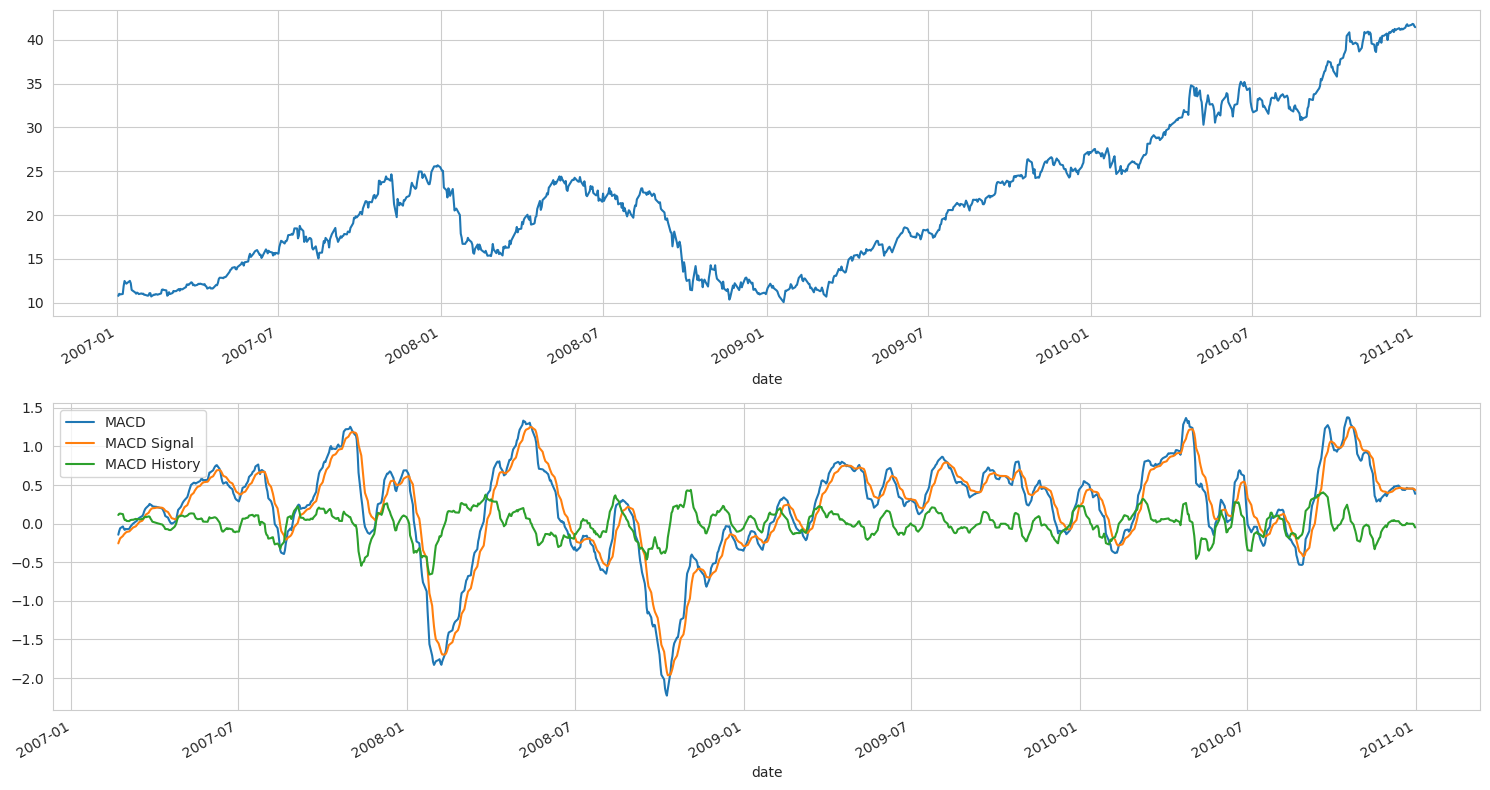

In [29]:
macd_data = pd.DataFrame({'AAPL': data.close, 'MACD': macd, 'MACD Signal': macdsignal, 'MACD History': macdhist})
fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
macd_data.AAPL.plot(ax=axes[0])
macd_data.drop('AAPL', axis=1).plot(ax=axes[1]) #
fig.tight_layout()
#sns.despine();

In [30]:
data = pd.DataFrame({'AAPL': data.close, 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

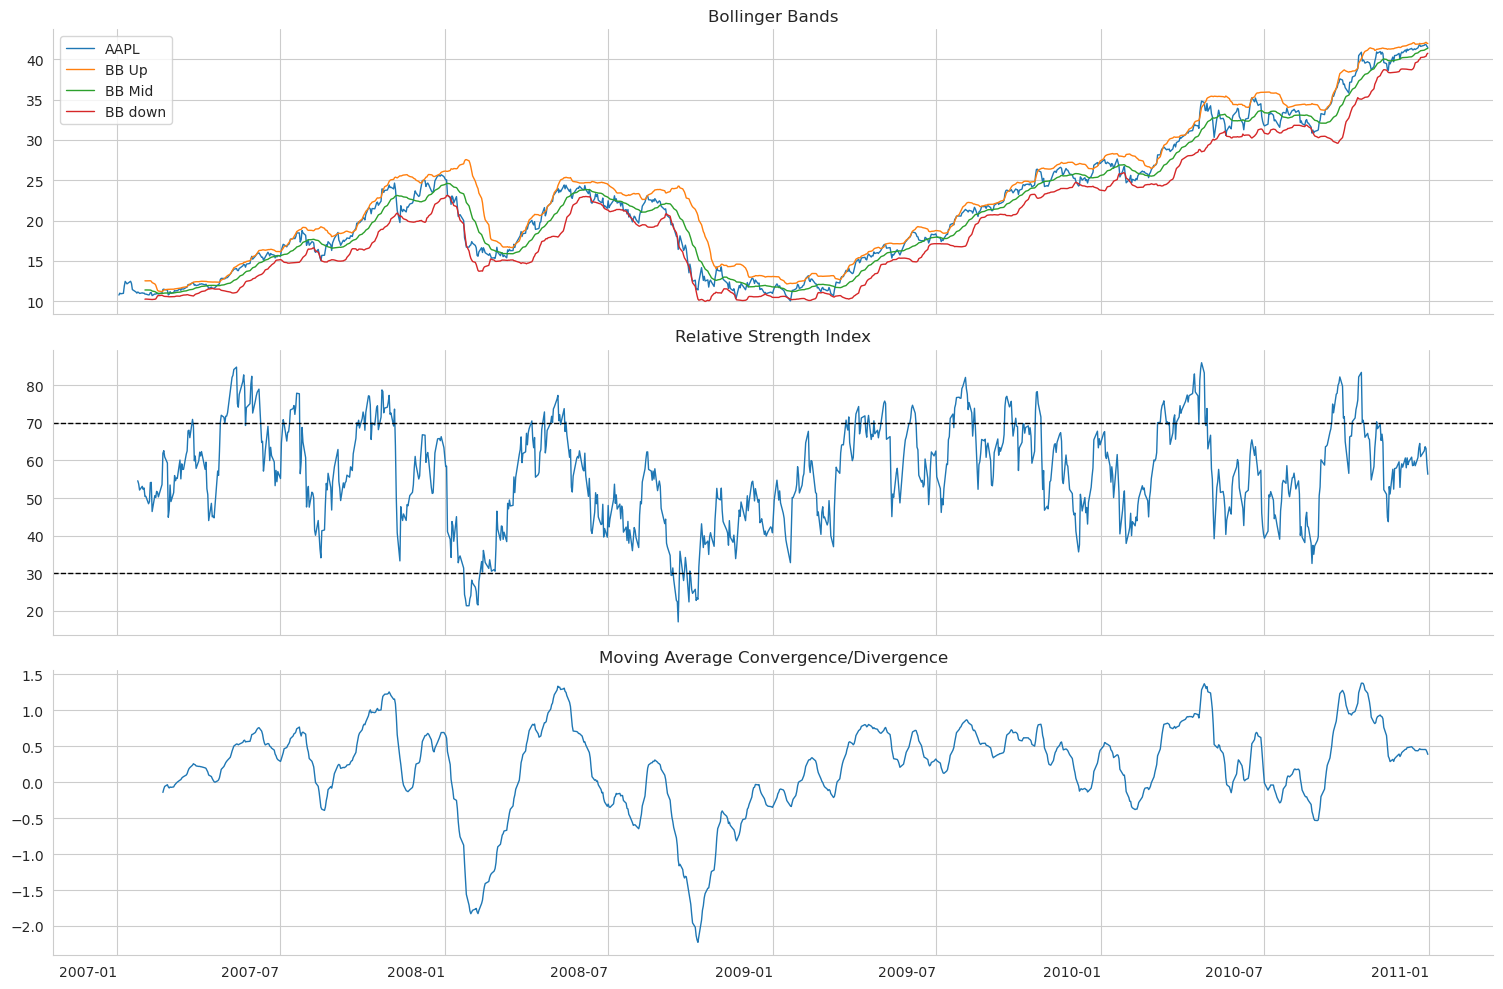

In [31]:
fig, axes= plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k') ## 添加直线
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();